# Overview
If you've taken any kind of stats course, you've come across things like t-tests, ANOVAs, and other members of the GLM family. You should know that they return p-values, or the odds that your sample (or samples) were drawn from noise. So, if you have two sets of numbers, setA and setB, the p-value refers to the odds that you'd observe a difference like the one you did (or larger) if they were, in fact, drawn from the same distribution. If the null were true (and they're from the same pool), you'd come up with your data (or more extreme) p-value percent of the time.   

Now, this leads to two types of errors you'd also heard about. Type I errors are often the most feared as those are "false positives" - the truth is there is no difference, but you still observed one.  Type II are "false negatives" - something was there, but you didn't see it. We're taught a few things about the GLM and one of the big ones is that the assumption that your data are "normally distributed". If they are, the test is valid. If not, the test isn't valid and you should either fix your data (transform it to make it normally distributed) or look elsewhere (say to a non-parametric test in classical frequentist statistics). 

In this project (Problem Set 9A), we're going to play around a bit with this and see just what happens when these assumptions are violated.  It'll give us a good bit of practice in simulating data and in running statistical tests. It'll also let us see that the t-test (and its GLM kin) are actually quite robust to Type I errors when normality is violated. It's not, however, robust to Type II errors. If you want to read up on this effect, here's a 
[nice paper on this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3139856/).

In the next one (9B), we'll code up a permutation test that computes the probability via brute force. These are getting more and more popular now that we have fast computers and don't do our statisitcs on ink quill pens and parchment.


First, write a function `GenNormalSamples` that generates two random sets of numbers using `scipy.stats.norm`. Parameters to the function should include the number of samples per group (`nsamples` defaulting to 10), the mean and standard deviation of setA (`meanA` defaulting to 0 and `stdA` defaulting to 1) and the same for setB (`meanB` and `stdB`). Numbers should be drawn from a normal random (Gaussian) distribution.  Return the `nsamples`x2 numpy array.

To check this out, use `plt.hist` to plot both your histograms on the same axes of the results from `GenNormalSamples(100,meanB=1.0)`.  It won't look exactly like this, but should be something like it.

![sample output](https://github.com/celstark/n247data/raw/main/data/stats_perm_fig1.png)


(array([[ 6.,  6., 12., 19., 30., 18.,  4.,  4.,  1.,  0.],
        [ 2.,  1.,  4., 18., 16., 14., 18., 15.,  7.,  5.]]),
 array([-1.99982691, -1.47592197, -0.95201703, -0.4281121 ,  0.09579284,
         0.61969778,  1.14360271,  1.66750765,  2.19141258,  2.71531752,
         3.23922246]),
 <a list of 2 BarContainer objects>)

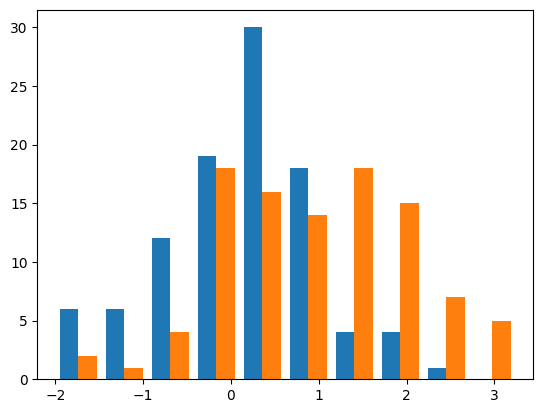

In [33]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
def GenNormalSamples(nsamples=10, meanA=0.0, stdA=1.0, meanB=0.0, stdB=1.0):
    '''generates two random sets of numbers using `scipy.stats.norm`. Parameters to the function should include 
    the number of samples per group (`nsamples` defaulting to 10),
      the mean and standard deviation of setA (`meanA` defaulting to 0 and `stdA` defaulting to 1) 
      and the same for setB (`meanB` and `stdB`). Numbers should be drawn from a normal random (Gaussian) distribution.  
      Return the `nsamples`x2 numpy array.'''
   
    set_1 = norm.rvs(loc=meanA,scale=stdA, size=nsamples)  #generate random numbers
    set_2 = norm.rvs(loc=meanB,scale=stdB, size=nsamples)  #generate random numbers

    result = [set_1, set_2]
    return result

data=GenNormalSamples(100,meanB=1.0)
plt.hist(data)


Next, write a function `CheckTtest` that calls `GenNormalSamples` `ntest` times (defult=1000) to generate random data and then calls `scipy.stats.ttest_ind` each time to test whether a standard t-test thinks these samples, in fact, come from different distributions. This function should take the same `nsamples`, `meanA/B` and `stdA/B` variables as `GenNormalSamples` did and it should pass these through to `GenNormalSamples`. 

From each call, keep track of the p-value returned. At the end, print out a nice statement that says "Out of ## tests, ## were significant, for a test positivity rate of 0.##". Use a p\<0.05 threshold as your "significant" rate.

Run your test with the default values (it should return roughly 0.05) and also with a few values of your choosing.

In [35]:
import numpy as np
from scipy.stats import ttest_ind

def CheckTtest(ntests=1000,nsamples=10,meanA=0,stdA=1,meanB=0,stdB=1):
    alpha = 0.05
    false_positive_count = 0
    for n in range(ntests):
        result = GenNormalSamples(nsamples, meanA, stdA, meanB, stdB)
        p_val = ttest_ind(result[0], result[1]).pvalue
        # print(p_val)
        # print(np.mean(result[0]), np.mean(result[1]))

        if p_val > alpha: #not significant 
            false_positive_count +=1 
    
    #compute test positivity rate
    print(f'Out of {ntests} tests, {ntests - false_positive_count} were significant, for a test positivity rate of ')


CheckTtest()
CheckTtest(meanB=1)

Out of 1000 tests, 51 were significant, for a test positivity rate of 
Out of 1000 tests, 557 were significant, for a test positivity rate of 


Now, copy your `GenNormalSamples` function and re-write it to create a skewed sample. Instead of using `scipy.stats.norm`, you'll use `scipy.stats.exponnorm`. 

This function takes a K parameter that controls the skew. K here must be >0, but 0 would be an actually un-skewed distribution. So, make sure to clip whatever K is passed in to a very small number like 0.0001 to approximate an unskewed normal distribution well enough.  Set the default `k` to be 0 so that by default, this does make a "normal" distribution sample.


Make the histogram you did as before, but use a k=20 this time.  It won't look exactly like this, but should be close:

![sample output](https://github.com/celstark/n247data/raw/main/data/stats_perm_fig2.png)

(array([[44., 28.,  6.,  9.,  5.,  3.,  1.,  2.,  1.,  1.],
        [30., 28., 18.,  8.,  9.,  4.,  2.,  1.,  0.,  0.]]),
 array([ -1.33371031,   9.59644319,  20.52659669,  31.45675019,
         42.38690369,  53.3170572 ,  64.2472107 ,  75.1773642 ,
         86.1075177 ,  97.0376712 , 107.96782471]),
 <a list of 2 BarContainer objects>)

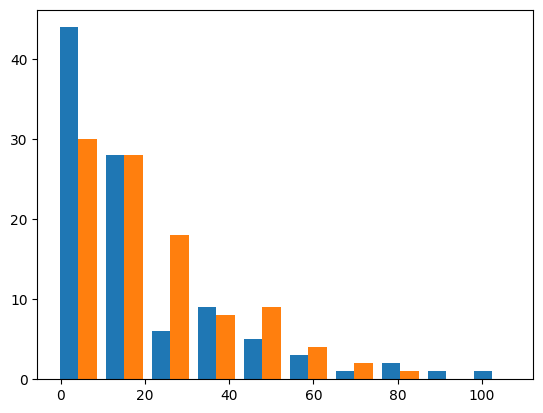

In [37]:
import numpy as np
from scipy.stats import exponnorm
from matplotlib import pyplot as plt
def GenNormalSamples(nsamples=10, meanA=0.0, stdA=1.0, meanB=0.0, stdB=1.0,k=0.0):
    set_1 = exponnorm.rvs(loc=meanA,scale=stdA, size=nsamples, K=k)  
    set_2 = exponnorm.rvs(loc=meanB,scale=stdB, size=nsamples, K=k) 

    result = [set_1, set_2]
    return result

data=GenNormalSamples(100,meanB=1.0,k=20.0)
plt.hist(data)


Copy your `CheckTtests` in here as well also adjust it to take the `k` parameter. Run it as before. What happens to the test positive rates when you use a value like k=20? Does it behave according to how we want it to behave?


In [ ]:
from scipy.stats import ttest_ind

def CheckTtest(ntests=1000,nsamples=10,meanA=0,stdA=1,meanB=0,stdB=1,k=0):
    # Your code here

print('These should be low (looking for Type I, want low) - same means - no skew and skew')
CheckTtest()
CheckTtest(k=20)

print('\nShifting the meanB to be 1.0 (looking for Type II, want high) - no skew and skew')
CheckTtest(meanB=1)
CheckTtest(meanB=1,k=20)



Clearly, the t-test is having an issue when the data aren't normally distributed (you do check all your data for normality when you use t-tests in your research right? *Right???*). Traditional stats have lots of options for you here with things like transforming your data to be normal or using non-parametric tests. 

But, we have computers and computers can do math fast. Why use tests that assume normality to estimate a probability when you can brute force the probability?  That's the goal we'll take in 9B...
